# Lecture 11: Poisson Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from math import factorial
from helper_functions import binomial

## Part 1. Introduction the Poisson distribution

The PMF of a poisson distribution is as follows:

$$P(X = k) = \frac{e^{-\lambda}\lambda^k}{k!}, k \in \{0, 1, 2, 3, ...\}$$

Where, $\lambda$ is equal to the "rate" parameter.

Like always, the first thing we do is prove that this is a valid PMF.

In [2]:
def poisson(lmbd, k):
    return (np.exp(-lmbd) * (lmbd**k)) / factorial(k)

We can also do an example plot

In [3]:
lmbd = 1
k = [i for i in range(0, 20)]
probs = [poisson(lmbd, i) for i in k]

np.array(probs).sum()

1.0

We can see that the sum is equal to one, which is a good start.

We can even plot an example as well.

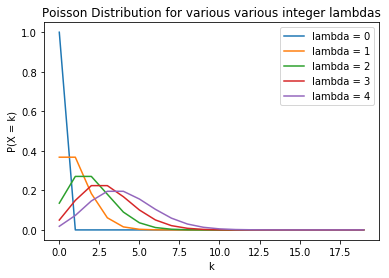

In [4]:
for lmbd in range(0, 5):
    plt.plot(k, [poisson(lmbd, i) for i in k], label=("lambda = {}".format(lmbd)))
plt.title("Poisson Distribution for various various integer lambdas")
plt.xlabel("k")
plt.ylabel("P(X = k)")
plt.legend()
plt.show()

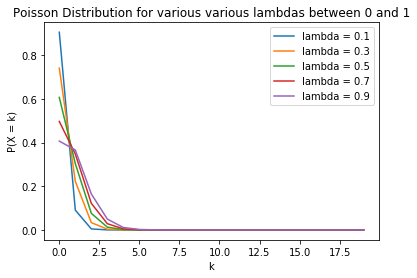

In [5]:
for lmbd in range(1, 10, 2):
    plt.plot(k, [poisson(lmbd/10, i) for i in k], label=("lambda = {}".format(lmbd/10)))
plt.legend()
plt.title("Poisson Distribution for various various lambdas between 0 and 1")
plt.xlabel("k")
plt.ylabel("P(X = k)")
plt.show()

We can see that the smaller levels of lambda have the hump closer to 0. The lambda is meant to be a rate so the larger it is, the less likely an event is to occur. 

## Part 2. Expectation value of Poisson

The expectation value of the poisson distribution is:

$$E(X) = e^{-\lambda} \sum_{k=0}^{\infty}\frac{k\lambda^k}{k!}$$

We can start the indexing at 1 since $P(k=0) = 0$, we can also pull out a lambda so that the indexing in the numerator equals that in the denominator:

$$E(X) = \lambda e^{-\lambda}\sum_{k=1}^{\inf}\frac{\lambda^{k-1}}{(k-1)!} = \lambda e^{-\lambda}e^{\lambda} = \lambda$$

This is exactly why the position of the hump above depends on lambda. 

## Part 3. Poisson as a special case of the binomial distribution.

Let $X \sim Bin(n, p)$. This means that:

$$P(X = k) = {n \choose k} p^k (1-p)^{n-k}$$

If you expand what all of these terms are and then set a limit where n $\rightarrow \inf$ and p $\rightarrow 0$ then

$$ \rightarrow \frac{e^{-\lambda}\lambda^k}{k!}$$

This means that the poisson distribution is a special case of the binomial where n is large and p is small. With the connection that $p = \frac{\lambda}{n}$ or $\lambda = np$.

In [6]:
# Let's try and prove this by recreating this.
n = 10_000
p = 0.0004
lambd = n*p

lambd

4.0

In [7]:
# Remember k from before
k

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [8]:
# Computer values
probs_binom = [binomial(n, p, i) for i in k]
probs_poisson = [poisson(lambd, i) for i in k]

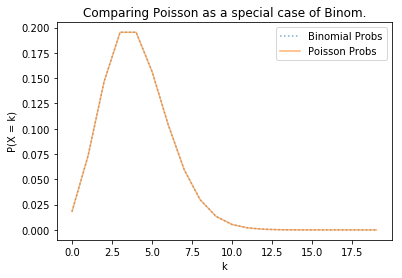

In [9]:
plt.plot(k, probs_binom, alpha=0.6, linestyle=':', label="Binomial Probs")
plt.plot(k, probs_poisson, alpha=0.6, label="Poisson Probs")
plt.title("Comparing Poisson as a special case of Binom.")
plt.xlabel("k")
plt.ylabel("P(X = k)")
plt.legend()
plt.show()

Holy shit, it's actually true!